In [1]:
import tweepy

auth = tweepy.OAuthHandler(consumer_key = 'b2naZOAwQBhBEHYFt2enZ660c',
                           consumer_secret = '3nUqbx6qMkVAIm0mV5bFnOhRZa1KCEQbbfWpzBWr1e5B2FPKyc')
auth.set_access_token('2465447359-nge8h5d3WTxZQZ3msNqTPHnqM0LAkwXOR6mQOPA',
                      'VS8W739mDtT9qdaK62iIEIRCLIP5YpBFUWzcotqWpdmkg')

api = tweepy.API(auth)


try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [27]:
# api.reverse_geocode(43.6637, -79.3862, 100)

user = api.get_user("realDonaldTrump")

print("User details:")
print(user.name)
print(user.description)
print(user.location)

User details:
Donald J. Trump
45th President of the United States of America🇺🇸
Washington, DC


***Methods for Searches*** 

Using these methods, you can search tweets using text, language, and other filters.

In [28]:
for tweet in api.search(q="election",
                        geocode="43.667821,-79.395652,10km",
                        lang="en"):
    print(f"{tweet.user.name}:{tweet.text}")

B lonson:RT @brianlilley: Trudeau has won but Canada loses.
This election result shows a deeply divided Canada and those divisions are about to get…
Gregory Zamarski:RT @colefwebber: me waking up in the same capitalist society the day after an election. https://t.co/Rtlgrxg3N1
HaP65:@frumoasajoyce @ruthmkb Isn't that what civilized people do? Celebrate a country? Know that the ending of an electi… https://t.co/JfTj0G4U9z
David Potter:RT @TheAgenda: "The most significant strategic decision that the Scheer campaign made to cost them this election was their decision not to…
Chris✞chronicpainDAD:RT @CanadaMoments: @ChronicPainDad In Canada, the Liberals won the election despite losing the popular vote to the Conservatives. The numbe…
Jesse Staniforth:RT @tyelland: maybe it’s just me but the columns of smiling trudeaus watching over the election coverage are fucking creepy https://t.co/0B…
Tim Grant for University-Rosedale:RT @TheAgenda: "The most significant strategic decision that the Sch

In [211]:
locations = api.trends_available()

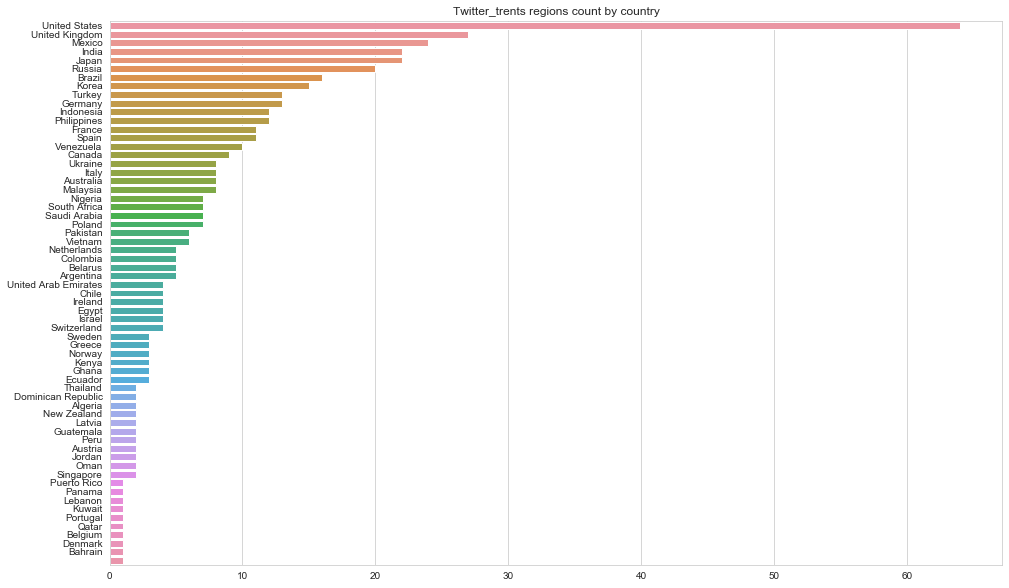

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

locations_df = pd.DataFrame(locations)
region_counts = locations_df.country.value_counts()

sns.set_style("whitegrid")
plt.subplots(figsize=[16,10])
sns.barplot(region_counts.values, region_counts.index, orient='h')
plt.title('Twitter_trents regions count by country')
plt.show()

In [83]:
trends_result = api.trends_place(4118) # Toronto 4118
for trend in trends_result[0]["trends"]:
    print(trend["name"])

#Livestockshattered3
#WeTheChamps
#wexit
#ScheerlessTuesday
WeWork
#1YearWithMono
Husky Energy
Dybala
Scott Moe
Grandma Winnie
Stecher
Bill Taylor
Sarri
emmanuel sanders
Premier Moe
Backlund
Ty Johnson
Hazard
Yaniv
western canadians
66% of Canadians
state of grace
Game Pass
'wexit'
Taubman
Canada-wide
#TravelTuesday
#TuesdayThoughts
#CellySzn
#Flames1stGoal
#FixWWE2K20
#NationalNutDay
#COYS
#inktoberday22
#7YearsOfRED
#ChampionsLeague
#weday
#NBATipOff
#TipTuesday
#Lynching
#JugoDay
#TriviaTuesday
#FintechMTL
#Algonquin2019
#GeekySummit
#jetsjams
#YorkU
#ActLikeIt
#LetsGoRaptors
#Albertans


In [74]:
status = api.search(q="Trump", tweet_mode="extended", language='eng', count=5000)

In [158]:
import pandas as pd
import json
from pymongo import MongoClient
client = MongoClient('localhost', 27017)

count = 0


class StreamListener(tweepy.StreamListener):
    """tweepy.StreamListener is a class provided by tweepy used to access
    the Twitter Streaming API to collect tweets in real-time.
    
    Link:
    https://github.com/tweepy/tweepy/blob/master/tweepy/streaming.py#L118
    """
        
    def on_connect(self):
        """Called when the connection is made"""
        
        print("You're connected to the streaming server.")
        

    def on_error(self, status_code):
        """This is called when an error occurs"""
        
        if status_code == 420:
            return False
        
        
    def on_data(self, data):
        """This will be called each time we receive stream data"""
        
        global count
        if count <= 1000:

            client = MongoClient()

            # store the results in training_tweets collection of tweets db
            db = client.tweets
            collection = db.training_tweets

            # decode JSON
            datajson = json.loads(data)

            # storying only tweets in English
            if "lang" in datajson and datajson["lang"] == "en":
                collection.insert_one(datajson)
            
            count += 1
            # print the progress every 100 tweets
            if count % 100 == 0: print(count, end="\r")
            
        else: return False
        
        
#         def on_status(self, status):
#         """This is called to check tweet's status.
#         Return nothing if was retweeted"""
        
#         if status.retweeted_status:
#             return
        
LOCATIONS = [-124.7771694, 24.520833, -66.947028, 49.384472,        # Contiguous US
                 -164.639405, 58.806859, -144.152365, 71.76871,         # Alaska
                 -160.161542, 18.776344, -154.641396, 22.878623] 

LOCATIONS_ON = [-83.04163, 41.90714, -73.43957, 46.87968]
stream_listener = StreamListener(api=tweepy.API(wait_on_rate_limit=True))
stream = tweepy.Stream(auth, stream_listener)
stream.filter(locations=LOCATIONS_ON)

You're connected to the streaming server.


In [159]:
import json
import unicodecsv as csv    # unicodecsv ensures that emojis are preserved

def tweets_json_to_csv(file_list, csv_output_file):
    
    '''
    INPUT: list of JSON files
    OUTPUT: single CSV file
    
    Takes a list of JSON files containing tweets and associated metadata and reads each file
    line by line, parsing the revelent fields, and writing it to a CSV file.
    take from: https://github.com/shawn-terryah/Twitter_Geolocation
    '''

    count = 0
    f = csv.writer(open(csv_output_file, "wb+"))
    
    # Column names
    f.writerow([
        'created_at',
        'tweet_id',                   #relabeled from id
        'text',
        'utc_offset',
        'nickname',                   #relabeled from screen_name
        'user_location',
        'followers_count',
        'friends_count',
        'favourites_count',
        'statuses_count',
        'listed_count',
        'coordinates_type',
        'coordinates',
        'place',
        'country_code'  
    ])

    for file_ in file_list:
        with open(file_, "r", encoding="utf8") as r:
            for line in r:
                try:
                    tweet = json.loads(line)
                except:
                    continue
                    
                text, coordinates_type, coordinates, place = 0, 0, 0, 0
                # use extended version of the text if available
                try: text = tweet['extended_tweet']['full_text']
                except: text = tweet['text']
                text = text.replace('\n', '').replace(';', '')
                
                # use more detailed coordinates if available
                try: coordinates_type, coordinates = tweet['coordinates']['type'], tweet['coordinates']['coordinates']  
                except: coordinates_type, coordinates = tweet['place']['bounding_box']['type'], tweet['place']['bounding_box']['coordinates']
                
                # use more detailed area if available
                if tweet['place']['place_type'] == 'admin':
                    place = tweet['place']['name']    
                else: place = tweet['place']['full_name']
                
                if tweet and tweet['place'] != None:
                    f.writerow([
                        tweet['created_at'],
                        tweet['id'],
                        text,
                        tweet['user']['utc_offset'],
                        tweet['user']['screen_name'],
                        tweet['user']['location'],
                        tweet['user']['followers_count'],
                        tweet['user']['friends_count'],
                        tweet['user']['favourites_count'],
                        tweet['user']['statuses_count'],
                        tweet['user']['listed_count'],
                        coordinates_type,
                        coordinates,
                        place,
                        tweet['place']['country_code']
                    ])                   
                    count += 1
                    
                    # Status update
                    if count % 100000 == 0:
                        print('Just stored tweet #{}'.format(count))
                        
if __name__ == "__main__":
    tweets_json_to_csv(['training_tweets.json'], 'training_tweets.csv')                     

In [221]:
import pandas as pd
import geopandas as gpd

# df = pd.read_csv('training_tweets.csv')
# df_ca = df[df.country_code == 'CA']

df = gpd.read_file('training_tweets.csv')
df_ca = df.loc[df.country_code == 'CA']

df_ca.coordinates = df_ca.coordinates.apply(lambda a: ast.literal_eval(a))

In [223]:
df.coordinates_type.value_counts()

Polygon    2033
Point       271
Name: coordinates_type, dtype: int64

In [197]:
from shapely.geometry import Point, Polygon

polygons_ca = df_ca.loc[df_ca.coordinates_type == 'Polygon']
polygons_count = pd.value_counts(polygons_ca.coordinates)
polygons_ca = [Polygon(a[0]) for a in polygons_count.index]

points_ca = df_ca.loc[df_ca.coordinates_type == 'Point']['coordinates']
points_ca = [Point(a) for a in points_ca.values]

In [215]:
import folium
m = folium.Map([44.2032, -78.4900], zoom_start=7, tiles='cartodbpositron')

for shape in polygons_ca + points_ca:
    folium.GeoJson(shape).add_to(m)
    

folium.LatLngPopup().add_to(m)
m